# Hardening Plasticity

## Overview

After the elastic limit of a material is exceeded and the material yields, further increases in load are usually required for plastic flow to continue.  This phenomenon is known as hardening and is broadly classified as either work or strain-hardening.  Hardening theories of plasticity describe the evolution of the strength through time.  This notebook

- presents an introduction to hardening plasticity,
- implements a hardening "$J_2$" plasticity model in Matmodlab for the case of linear isotropic strain hardening,
- verifies the $J_2$ model against analytic solutions.


## See Also

- [User Defined Materials](UserMaterial.ipynb)
- [Linear Elastic Material](LinearElastic.ipynb)
- [Nonhardening Plasticity](NonhardeningJ2Plasticity.ipynb)

<a name='contents'></a>
## Contents

1. <a href='#plast'>Hardening Plasticity</a>
2. <a href='#j2'>$J_2$ Plasticity</a>
2. <a href='#umat.std'>Standard Model Implementation</a>

<a name='plastic'></a>
## Hardening Plasticity

### Overview

Similar to nonhardening theories of plasticity, the hardening theory of plasticity presumes the existence of an elastic limit defined by a yield surface

$$
f\left(\pmb{\sigma}, Y\right) = 0
$$

where $f$ is the yield function.  Unlike the nonhardening theory, the yield function depends not only on the mechanical stress $\pmb{\sigma}$ but also the (nonconstant) yield strength $Y$.  

The rate of mechanical stress is given by

$$
\dot{\pmb{\sigma}} = \mathbb{C}{:}\dot{\pmb{\epsilon}}^{\rm e}
$$

where $\mathbb{C}$ is the elastic stiffness and $\dot{\pmb{\epsilon}}^{\rm e}$ the rate of elastic strain.  Presuming that the rate of strain is the sum of elastic and plastic parts, the mechanical response is defined by

$$
\dot{\pmb{\sigma}} = \mathbb{C}{:}\left(\dot{\pmb{\epsilon}} - \dot{\pmb{\epsilon}}^{\rm p}\right)
$$

where $\dot{\pmb{\epsilon}}^{\rm p}$ is the rate of plastic strain.  Replacing $\dot{\pmb{\epsilon}}^{\rm p}$ with $\dot{\lambda}\pmb{m}$, $\dot{\lambda}$ being the magnitude of $\dot{\pmb{\epsilon}}^{\rm p}$ and $\pmb{m}$ its direction, the mechanical response of the material is

$$
\dot{\pmb{\sigma}} = \mathbb{C}{:}\left(\dot{\pmb{\epsilon}} - \dot{\lambda}\pmb{m}\right)
$$

The solution to the plasticity problem is reduced to determining $\dot{\lambda}$ such that $f\left(\pmb{\sigma}(t), Y(t)\right)\leq 0 \ \forall t>0$

### Solution Process

Given the current state of stress $\pmb{\sigma}_n$, the solution to the plasticity problem begins with the hypothesis that the entire strain increment is elastic:

$$
\pmb{\sigma}_{\rm new} \stackrel{?}{=} \pmb{\sigma}_{\rm old} + \mathbb{C}{:}\dot{\pmb{\epsilon}}dt = \pmb{\sigma}^{\rm test}
$$

where the descriptor "test" is used to signal the fact that at this point $\pmb{\sigma}^{\rm test}$ is merely a hypothesized solution.  The hypothesis is validated if $\pmb{\sigma}^{\rm test}$ satisfies the yield condition 

$$f\left(\pmb{\sigma}^{\rm test}, Y^{\rm test}\right)\leq 0$$

so that $\pmb{\sigma}_{\rm new}=\pmb{\sigma}^{\rm test}$.  

If instead the hypothesis is *falsefied*, i.e., the predicted test stress falls outside of the yield surface defined by $f=0$, the plasticity problem, 

$$\begin{align}
\pmb{\sigma}_{\rm new} = \pmb{\sigma}_{\rm old} + \mathbb{C}{:}\left(\dot{\pmb{\epsilon}} - \dot{\lambda}\pmb{m}\right)dt &= \pmb{\sigma}^{\rm trial} - \dot{\lambda}\pmb{A}dt\\
f\left(\pmb{\sigma}^{\rm trial} - \dot{\lambda}\pmb{A}dt, Y\right) &= 0
\end{align}$$

where $\pmb{A}=\mathbb{C}{:}\pmb{m}$, is solved.  $\dot{\pmb{\sigma}}^{\rm trial}=\mathbb{C}{:}\dot{\pmb{\epsilon}}$ is distinguished from $\dot{\pmb{\sigma}}^{\rm test}$ in that for stress driven problems $\dot{\pmb{\sigma}}^{\rm trial}$ is not necessarily known because the strain rates $\dot{\epsilon}$ are not known.

The unknown scalar $\dot{\lambda}$ is determined by noting the following observation: if $f\left(\pmb{\sigma}_{\rm old}, Y_{\rm old}\right)=0$ and, after continued loading, $f\left(\pmb{\sigma}_{\rm new}, Y_{\rm new}\right)=0$, the rate of change of $f$ itself must be zero.  Thus, by the chain rule,

$$
\dot{f}{\left(\pmb{\sigma}, Y\right)}
    =\frac{df}{d\pmb{\sigma}}{:}\dot{\pmb{\sigma}}
     +\frac{df}{dY}\dot{Y} = 0
$$

During elastic loading, the yield strength does not change.  Therefore, we presume that the rate of $Y$ is of the form

$$
\dot{Y} = \dot{\lambda}h_{Y}
$$

where $\dot{\lambda}$ is the rate of plastic strain and $h_{Y}$ the modulus of $Y$.  Since $Y$ is tied to the internal state of the material, it is regarded as a "solution-dependent variable" (SDV) and $h_Y$ a SDV modulus.  SDV moduli must be determined from experiment or microphysical considerations.

Substituting the expression for $\dot{Y}$ in to the consistency condition gives

$$
\frac{df}{d\pmb{\sigma}}{:}\left(\mathbb{C}{:}\dot{\epsilon}-\dot{\lambda}\pmb{A}\right) + \frac{df}{dY}\dot{\lambda}h_Y = 0
$$


Letting

$$
\pmb{n} = \frac{df}{d\pmb{\sigma}}\Big/\Big\lVert\frac{df}{d\pmb{\sigma}}\Big\rVert
$$

the preceding equation can be solved $\dot{\lambda}$, giving

$$
\dot{\lambda} 
   = \frac{\pmb{n}{:}\mathbb{C}{:}\dot{\epsilon}}{\pmb{n}{:}\pmb{A}+H}
$$

where 

$$
H = -\frac{df}{dY}\Big/\Big\lVert\frac{df}{d\pmb{\sigma}}\Big\rVert h_Y
$$

Substituting $\dot{\lambda}$ in to the expression for stress rate gives

$$\begin{align}
\dot{\pmb{\sigma}} 
   &= \mathbb{C}{:}\dot{\pmb{\epsilon}} - \frac{\pmb{n}{:}\mathbb{C}{:}\dot{\epsilon}}{\pmb{n}{:}\pmb{A}+H}\pmb{A}\\
   &= \mathbb{C}{:}\dot{\pmb{\epsilon}} - \frac{1}{\pmb{n}{:}\pmb{A}+H}\pmb{Q}\pmb{A}{:}\dot{\pmb{\epsilon}}\\
   &= \mathbb{D}{:}\dot{\pmb{\epsilon}}
\end{align}$$

where

$$
\pmb{Q} = \mathbb{C}{:}\pmb{n}
$$
and
$$
\mathbb{D} = \mathbb{C} - \frac{1}{\pmb{n}{:}\pmb{A}+H}\pmb{Q}\pmb{A}
$$

The stress rate is then integrated through time to determine $\pmb{\sigma}$

### Integration Procedure

Unlike the nonhardening case, the expression for the stress rate

$$
\dot{\pmb{\sigma}} 
  = \dot{\pmb{\sigma}}^{\rm trial} 
  - \frac{\pmb{n}{:}\dot{\pmb{\sigma}}^{\rm trial}}{\pmb{n}{:}\pmb{A}+H}\pmb{A}
$$

*is not* a projection of the trial stress rate, but it is still true that

$$\pmb{\sigma}_{\rm new} = \pmb{\sigma}^{\rm trial} - \Gamma\pmb{A}$$

$\Gamma$ is determined by satisfying the now *evolving* yield condition.  In other words, $\Gamma$ is the solution to

$$f\left(\pmb{\sigma}^{\rm trial} - \Gamma\pmb{A}, Y(\Gamma)\right)=0$$

The unknown $\Gamma$ is found such that $f\left(\pmb{\sigma}(\Gamma), Y(\Gamma)\right)=0$.  The solution can be found by solving the preceding equation iteratively by applying Newton's method so that

$$
\Gamma^{i+1} = \Gamma^i 
- \frac{f\left(\pmb{\sigma}(\Gamma^{n}), Y(\Gamma)\right)}
       {\frac{df}{d\pmb{\sigma}}{:}\frac{d\pmb{\sigma}}{d\Gamma} + \frac{df}{dY}\frac{dY}{d\Gamma}}
= \Gamma^i 
+ \frac{g\left(\pmb{\sigma}(\Gamma^{n}), Y(\Gamma)\right)}
       {\pmb{n}{:}\pmb{A}-\frac{df}{dY}\frac{dY}{d\Gamma}}
$$

where $g = f\Big/\lVert df/d\pmb{\sigma}\rVert$.

When $\Gamma^{i+1}-\Gamma^i<\epsilon$, where $\epsilon$ is a small number, the iterations are complete and the updated stress can be determined.

Note that the scalar $\Gamma$ is also equal to $\Gamma=\dot{\lambda}dt$, but since $\dot{\lambda}=0$ for elastic loading, $\Gamma=\dot{\lambda}dt^p$, where $dt^p$ is the plastic part of the time step.  This gives $\Gamma$ the following physical interpretation: it is the magnigute of the total plastic strain increment.

## $J_2$ Plasticity

The equations developed thus far are general in the sense that they apply to any material that can be modeled by hardening plasticity.  The equations are now specialized to the case of isotropic hypoelasticity and $J_2$ plasticity by defining

$$\begin{align}
\dot{\pmb{\sigma}} &= 3K\,\mathrm{iso}\dot{\pmb{\epsilon}}^{\rm e} + 2G\,\mathrm{dev}\dot{\pmb{\epsilon}}^{\rm e} \\
f\left(\pmb{\sigma}\right) &= \sqrt{J_2} - \frac{1}{\sqrt{3}}Y\left(\epsilon^p_{eq}\right)
\end{align}
$$

where $J_2$ is the second invariant of the stress deviator, defined as

$$J_2 = \frac{1}{2}\pmb{s}{:}\pmb{s}, \quad \pmb{s} = \pmb{\sigma} - \frac{1}{3}\mathrm{tr}\left(\pmb{\sigma}\right)\pmb{I}$$

and $Y\left(\epsilon^p_{eq}\right)$ is the plastic strain dependent yield strength in tension.

Additionally, we adopt the assumption of an **associative flow rule** wherein $\pmb{m}=\pmb{n}$.  Accordingly,

$$\begin{align}
\frac{df}{d\pmb{\sigma}}&=\frac{1}{2\sqrt{J_2}}\pmb{s}, &\pmb{n}=\frac{1}{\sqrt{2J_2}}\pmb{s} \\
\pmb{A}&=\frac{2G}{\sqrt{2J_2}}\pmb{s}, &\pmb{Q}=\frac{2G}{\sqrt{2J_2}}\pmb{s}
\end{align}$$

### Linear Hardening

Returning now to the definition of $Y$.  Let 

$$Y = Y_0 + Y_1 \epsilon^p_{eq}$$

where $Y_0$ is the initial strength and $Y_1$ is a fitting parameter.  Taking the rate of $Y$ allows determining the SDV modulus $h_Y$:

$$\dot{Y} = Y_1\dot{\epsilon}^p_{eq} = h_Y\dot{\lambda}, \quad h_Y = \sqrt{\frac{2}{3}}Y_1$$

#### Required Parameters

The model as described above requires at minimum 4 parameters: 2 independent elastic moduli and the yield strength parameters $Y_0$ and $Y_1$.

#### Solution Dependent Variables

Evaluation of $Y$ requires storing and tracking the equivalent plastic strain $\epsilon_{eq}^p$

### Power-Law Hardening

A phenomenological power-law model presumes that

$$Y = Y_0 + Y_1 \left(\epsilon^p_{eq}\right)^m$$

where $Y_0$ is the initial strength and $K_1$ is a fitting parameter.  Taking the rate of $Y$ allows determining the SDV modulus $h_Y$:

$$\dot{Y} = h_Y\dot{\lambda}, \quad h_Y = \sqrt{\frac{2}{3}}mY_1\left[\frac{Y-Y_0}{Y_1}\right]^{\frac{m-1}{m}}$$

#### Required Parameters

The model as described above requires at minimum 4 parameters: 2 independent elastic moduli and the yield strength parameters $Y_0$, $Y_1$, and $m$.

#### Solution Dependent Variables

Evaluation of $Y$ requires storing and tracking the equivalent plastic strain $\epsilon_{eq}^p$

### Work Hardening

A phenomenological linear work hardening model presumes that

$$Y = Y_0 + Y_1 W_P, \quad W_P = \int_0^t \pmb{\sigma}{:}\dot{\pmb{\epsilon}}^p dt$$

where $Y_0$ is the initial strength and $K_1$ is a fitting parameter.  Taking the rate of $Y$ allows determining the SDV modulus $h_Y$:

$$\dot{Y} = h_Y\dot{\lambda}, \quad h_Y = mY_1\left[\frac{Y-Y_0}{Y_1}\right]^{\frac{m-1}{m}}\sqrt{\pmb{m}{:}\pmb{m}}$$

#### Required Parameters

The model as described above requires at minimum 4 parameters: 2 independent elastic moduli and the yield strength parameters $Y_0$, $Y_1$, and $m$.

#### Solution Dependent Variables

Evaluation of $Y$ requires storing and tracking the equivalent plastic strain $\epsilon_{eq}^p$

<a name='umat.std'></a>
## Model Implementation

The plastic material described above is implemented as `HardeningPlasticMaterial` in `matmodlab2/materials/plastic3.py`.  `HardeningPlasticMaterial` is implemented as a subclass of the `matmodlab2.core.material.Material` class.  `HardeningPlasticMaterial` defines

- `name`: *class attribute*

   Used for referencing the material model in the `MaterialPointSimulator`.
   
- `eval`: *instance method*

   Updates the material stress, stiffness (optional), and state dependent variables to the end of the time increment.
   
In the model, in addition to some standard functions imported from `Numpy`, several helper functions are imported from various locations in Matmodlab:

- `matmodlab.core.tensor`

   - `isotropic_part`, `deviatoric_part`: computes the isotropic and deviatoric parts of a second-order symmetric tensor stored as an array of length 6
   - `magnitude`: computes the magnitude $\left(\lVert x_{ij} \rVert=\sqrt{x_{ij}x_{ij}}\right)$ of a second-order symmetric tensor stored as an array of length 6
   - `double_dot`: computes the double dot product of second-order symmetric tensors stored as an array of length 6
   - `VOIGT`: mulitplier for converting tensor strain components to engineering strain components
   

### Model Source

The source of the file can be viewed by executing the following cell.

In [1]:
%pycat ../matmodlab2/materials/plastic3.py

In [1]:
%pylab inline
from bokeh.io import output_notebook
from bokeh.plotting import *
from matmodlab2 import *
from numpy import *
from plotting_helpers import create_figure
output_notebook()

Populating the interactive namespace from numpy and matplotlib
Setting up the Matmodlab notebook environment


Loading BokehJS ...

In [12]:
import pandas as pd
pd.set_option('precision', 20)

### Verification

Exercising the elastic model through a path of uniaxial stress should result in the slope of axial stress vs. axial strain being equal to the input parameter `E` for the elastic portion.  The maximum stress should be equal to the input parameter `Y`.

**Note:** the input parameters to a standard material are given as a dictionary of `name:value` pairs for each paramter.  Parameters not specified are initialized to a value of zero.

                      F.XX                    F.YY                    F.ZZ  \
0   1.00000000000000000000  1.00000000000000000000  1.00000000000000000000   
1   1.00008000320008538786  0.99997336035484163386  0.99997336035484163386   
2   1.00016001280068289603  0.99994672141935392329  0.99994672141935392329   
3   1.00024002880230433732  0.99992008319351799450  0.99992008319351799450   
4   1.00032005120546196864  0.99989344567731497371  0.99989344567731497371   
5   1.00040008001066804688  0.99986680887072598711  0.99986680887072598711   
6   1.00048011521843460692  0.99984017277373204990  0.99984017277373204990   
7   1.00056015682927390564  0.99981353738631428829  0.99981353738631428829   
8   1.00064020484369819997  0.99978690270845382848  0.99978690270845382848   
9   1.00072025926221974679  0.99976026874013168566  0.99976026874013168566   
10  1.00080032008535102506  0.99973363548132898604  0.99973363548132898604   
11  1.00088038731360429168  0.99970700293202685582  0.9997070029

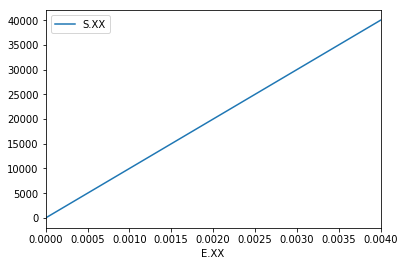

In [13]:
mps1 = MaterialPointSimulator('uplastic-std')
p = {'E': 10e6, 'Nu': .333, 'Y0': 40e3}
mps1.material = HardeningPlasticMaterial(**p)
mps1.run_step('ESS', (.004, 0, 0), frames=50)

i = where((mps1.df['E.XX'] > 0.) & (mps1.df['E.XX'] < .005))
E = mps1.df['S.XX'].iloc[i] / mps1.df['E.XX'].iloc[i]
assert allclose(E.iloc[0], 10e6, atol=1e-3, rtol=1e-3)
assert amax(mps1.df['S.XX']) - 40e3 < 1e-6
#plot = create_figure(bokeh=True, x_axis_label='Strain', y_axis_label='Stress')
mps1.plot('E.XX', 'S.XX')

print(mps1.df[['F.XX','F.YY','F.ZZ','S.XX']])

                      F.XX                    S.XX                    S.YY
0   1.00000000000000000000  0.00000000000000000000  0.00000000000000000000
1   1.00150112556271109199  0.04249999999999999611  0.01249999999999999896
2   1.00300450450337730324  0.08500000000000000611  0.02499999999999999445
3   1.00451014020460172027  0.12750000000000000222  0.03749999999999999167
4   1.00601803605406536768  0.16999999999999998446  0.04999999999999998890
5   1.00752819544453453560  0.21249999999999996669  0.06249999999999997918
6   1.00904062177386855126  0.25499999999999994893  0.07499999999999998335
7   1.01055531844502710648  0.29749999999999998668  0.08749999999999998057
8   1.01207228886607869534  0.34000000000000002442  0.09999999999999999167
9   1.01359153645020705348  0.38250000000000006217  0.11250000000000000278
10  1.01511306461572003990  0.42500000000000009992  0.12500000000000000000
11  1.01663687678605674236  0.46750000000000013767  0.13749999999999998335
12  1.0181629763897950269

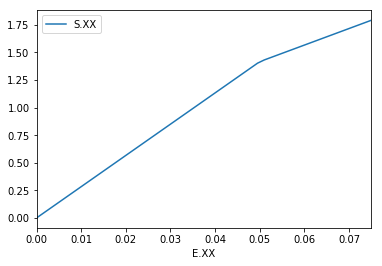

In [27]:
mps1 = MaterialPointSimulator('uplastic-std')
p = {'K': 15, 'G': 10, 'Y0': 1}
mps1.material = VonMisesMaterial(**p)
mps1.run_step('EEE', (.075, 0, 0), frames=50)
mps1.plot('E.XX', 'S.XX')

print(mps1.df[['F.XX','S.XX','S.YY']])

In [ ]:
1.020201  0.990711  0.990711

#### Linear Hardening

In [4]:
mps1 = MaterialPointSimulator('uplastic-std')
p = {'E': 10e6, 'Nu': .333, 'Y0': 40e3, 'Y1': 2e6}
mps1.material = HardeningPlasticMaterial(**p)
mps1.run_step('ESS', (.02, 0, 0), frames=50)

plot = create_figure(bokeh=True, x_axis_label='Strain', y_axis_label='Stress')
plot.line(mps1.df['E.XX'], mps1.df['S.XX'])
show(plot);

#### Nonlinear Hardening

In [5]:
mps1 = MaterialPointSimulator('uplastic-std')
p = {'E': 10e6, 'Nu': .333, 'Y0': 40e3, 'Y1': 2e4, 'm': .4}
mps1.material = HardeningPlasticMaterial(**p)
mps1.run_step('ESS', (.02, 0, 0), frames=50)
plot = create_figure(bokeh=True, x_axis_label='Strain', y_axis_label='Stress')
plot.line(mps1.df['E.XX'], mps1.df['S.XX'])
show(plot);

### Validation

Let us now fit experimental data

In [6]:
from pandas import read_excel
from scipy.optimize import fmin
from scipy.stats import linregress

In [7]:
L0 = 2.25
D0 = 0.525
A0 = pi * (D0 / 2.) ** 2
df = read_excel('aldat.xls', skiprows=9)

# subtract initial displacement and compute stress/strain
df['Crosshead displacement'] -= df['Crosshead displacement'].iloc[0]
df['Stress'] = df['Load'] / A0
df['Strain'] = log((L0 + df['Crosshead displacement']) / L0)
df['dStress'] = ediff1d(df['Stress'], to_begin=0)
df['dStrain'] = ediff1d(df['Strain'], to_begin=0)

#### Determine elastic response

In [8]:
plot = create_figure(bokeh=True, x_axis_label='Strain', y_axis_label='Stress')
plot.line(df['Strain'], df['Stress'])
show(plot);

In [9]:
df = df[df['Strain'] >= 1.5e-3]
df_e = df[(df['Strain'] < .017) & (df['Strain'] > .004)].copy()
df_e['Strain'] -= df_e['Strain'].iloc[0]
plot = create_figure(bokeh=True, x_axis_label='Strain', y_axis_label='Stress')
plot.line(df_e['Strain'], df_e['Stress'])
show(plot)

In [10]:
E = polyfit(df_e['Strain'], df_e['Stress'], 1)[0]
p = {'E': E}
plot = figure()
plot.circle(df['Strain'], df['Stress'])
ee = linspace(0, .015)
plot.line(ee, E * ee, color='red')
show(plot)

In [11]:
df['dEE'] = df['dStress'] / E
df['dEP'] = df['dStrain'] - df['dEE']
df['EE'] = cumsum(df['dEE'])
df['EP'] = cumsum(df['dEP'])
df['EPEQ'] = sqrt(2./3.) * df['EP']
dwp = df['dStress'] * df['dEP']
df['WP'] = cumsum(dwp)
i = df['Stress'].argmax()
df_p = df[(df['Strain'] >= .02) & (df['Strain'] < df['Strain'][i])]

In [12]:
#print df.loc(i)
#df_p = df[(df['Strain'] >= .03) & (df['Strain'] < .15)]

M, N = 350, 350
p1 = figure(x_axis_label='EPEQ', y_axis_label='Y', 
            width=M, plot_height=N,
            title='Linear Hardening')
p1.circle(df_p['EPEQ'], df_p['Stress'])

p2 = figure(x_axis_label='Log[EPEQ]', y_axis_label='Log[Y]', 
            width=M, plot_height=N,
            title='Power Law Hardening')
p2.circle(log(df_p['EPEQ']), log(df_p['Stress']))

p3 = figure(x_axis_label='EP', y_axis_label='Y', 
            width=M, plot_height=N,
            title='Work Hardening')
p3.circle(df_p['WP'], df_p['Stress'])

p4 = figure(x_axis_label='E', y_axis_label='EE, EP',
            width=M, plot_height=N)
p4.circle(df_p['EE'], df_p['Strain'], legend='EE')
p4.circle(df_p['EP'], df_p['Strain'], color='red', legend='EP')

gp = gridplot([[p1, p2], [p3, p4]])
show(gp)

### Power law model fit

In [13]:
p['Y0'] = 38e3
x = polyfit(log(df_p['EPEQ']), log(df_p['Stress']-p['Y0']) , 1)
p['m'] = x[0]
p['Y1'] = exp(x[1])
p, x

({'E': 2718471.6546587194,
  'Y0': 38000.0,
  'Y1': 17591.472469736145,
  'm': 0.43268943216746447},
 array([ 0.43268943,  9.77516954]))

In [14]:
mps = MaterialPointSimulator('uplastic-std')
p['Nu'] = .333
mps.material = HardeningPlasticMaterial(**p)
mps.run_step('ESS', (.08, 0, 0), frames=100)

plot = create_figure(bokeh=True, x_axis_label='Strain', y_axis_label='Stress')
plot.line(mps.df['E.XX'], mps.df['S.XX'], color='red', legend='Model')
plot.circle(df['Strain'], df['Stress'], legend='Experiment')
show(plot)